# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# importing datasets

In [6]:
# boston dataset
boston=pd.read_csv(r"https://raw.githubusercontent.com/swapan007/My-Notes-Machine-Learning/master/datasets/Boston.csv")
# iris dataset
iris=pd.read_csv(r"https://raw.githubusercontent.com/swapan007/My-Notes-Machine-Learning/master/datasets/IRIS.csv")

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Model 1: for Boston dataset

In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
y=boston['MEDV']
x=boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

### Get X Variables Standardized

In [12]:
from sklearn.preprocessing import StandardScaler 
mm=StandardScaler ()
x=mm.fit_transform(x)
(pd.DataFrame(x).describe())

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.337643e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


### get train test split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2525)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# Get Model Train

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
model1=KNeighborsRegressor()

In [16]:
model1.fit(x_train,y_train)

KNeighborsRegressor()

## Get Model Prediction

In [18]:
y_pred=model1.predict(x_test)
y_pred.shape

(152,)

In [19]:
y_pred

array([32.16, 26.48, 13.46, 41.28, 16.24, 23.62, 24.4 , 26.78, 14.22,
       20.7 , 21.52, 21.34, 33.22, 25.18,  8.1 , 20.72, 20.98, 19.12,
       21.14, 16.28, 10.18, 25.06, 19.54, 21.78, 24.18, 23.52, 22.14,
       21.28, 23.82, 25.58, 12.66, 25.88, 20.68, 11.  , 16.24, 19.8 ,
       28.88, 29.26, 10.36, 24.14, 19.22, 21.5 , 26.48, 37.3 , 21.36,
       23.12, 41.28, 30.38, 24.16, 32.42, 25.34, 19.82, 17.9 , 12.62,
       18.78, 20.46, 20.1 , 24.06, 23.4 , 23.78, 18.4 , 37.3 , 36.84,
       25.12, 20.08, 26.76, 26.06, 21.78, 37.3 , 21.44, 19.8 , 28.08,
       30.34, 32.8 , 22.74, 30.34, 20.16, 19.82, 12.7 , 26.26, 29.6 ,
       28.28, 22.9 , 28.28, 23.62, 14.26, 20.02, 22.48, 17.66, 24.38,
       21.94, 39.12, 31.52, 26.94, 20.16, 18.78, 22.9 , 25.4 , 14.82,
       38.62, 17.92, 19.24, 25.32, 20.64, 12.94, 13.98, 22.18, 23.36,
       19.12, 24.34, 21.72, 22.36, 24.82, 28.06, 23.62,  9.16, 18.98,
       22.64, 43.3 , 12.36, 18.68, 21.3 , 20.58, 22.6 , 24.78, 20.88,
       29.2 , 16.26,

## Get Model Evaluation

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
mean_squared_error(y_test,y_pred)

22.45169736842105

In [22]:
mean_absolute_error(y_test,y_pred)

2.946710526315789

### finding best k value

In [26]:
error_rate=[]
for i in range(1,41):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(mean_absolute_error(y_test,pred_i))       

In [27]:
error_rate

[3.0703947368421054,
 2.9651315789473687,
 2.7907894736842107,
 2.8692434210526314,
 2.946710526315789,
 3.0283991228070177,
 3.030733082706767,
 3.0467927631578946,
 2.9990497076023397,
 3.042894736842105,
 3.0638755980861245,
 3.0733004385964917,
 3.1038967611336035,
 3.1162124060150385,
 3.1870175438596497,
 3.234539473684211,
 3.270433436532508,
 3.299926900584795,
 3.320983379501385,
 3.344703947368421,
 3.3595238095238096,
 3.361812200956938,
 3.4053775743707093,
 3.437225877192982,
 3.42828947368421,
 3.455946356275303,
 3.464473684210526,
 3.5092810150375935,
 3.5167196007259527,
 3.5958771929824556,
 3.6250424448217315,
 3.6663240131578947,
 3.6843301435406697,
 3.698413312693498,
 3.703571428571428,
 3.737244152046783,
 3.766002844950213,
 3.806994459833795,
 3.803711201079622,
 3.845838815789473]

### plotting the k

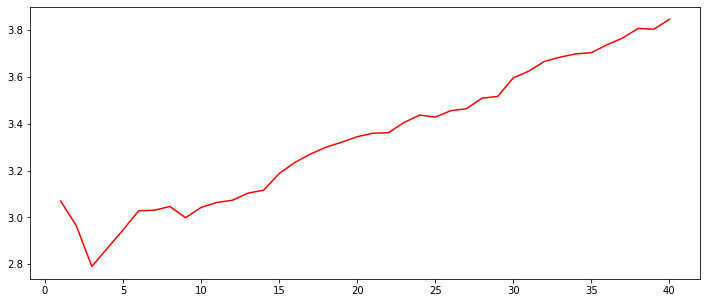

In [29]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(range(1,41),error_rate,color='red')
plt.show()

# Model 2: for IRIS dataset

In [30]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [31]:
x=iris.drop(['species'],axis=1)

In [32]:
y=iris['species']

### encoding the y label

In [34]:
# before
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

# get train test split

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2525)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Get X Variables Standardized

In [53]:
from sklearn.preprocessing import StandardScaler 
mm=StandardScaler ()
x=mm.fit_transform(x)
(pd.DataFrame(x).describe())

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.049161e-16,-9.150088e-17,-2.649732e-16,1.609823e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Get Model Train

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

### Get Model Prediction

In [55]:
y_pred=model2.predict(x_test)
y_pred.shape

(45,)

### Get Model Evaluation

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 14  3]
 [ 0  1 11]]


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      0.82      0.87        17
           2       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## finding best k value

In [61]:
error_rate=[]
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))    

In [62]:
error_rate

[0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.06666666666666667,
 0.08888888888888889,
 0.06666666666666667,
 0.08888888888888889,
 0.06666666666666667,
 0.08888888888888889,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.08888888888888889]

Text(0, 0.5, 'Error Rate')

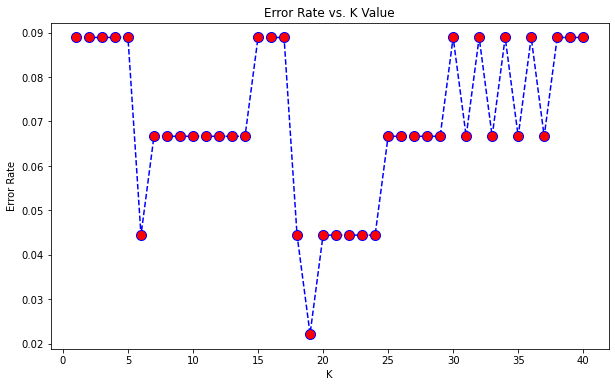

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")